# Project 9 -Partial Correlations and Directed Acyclic Graphs

## Generating artificial data

In [2]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [23.937208419919653,
  25.081428567950617,
  25.994766047910964,
  30.524151398844907,
  26.327478834196693,
  23.87499040943576,
  22.234880669781504,
  25.757381011294978,
  18.803799830397864,
  23.618913449452567,
  26.46626260735231,
  28.740131066316767,
  24.656778811052828,
  25.867372919968975,
  20.50654812637272,
  23.354662515978596,
  27.86793910857686,
  24.684460388754655,
  27.49304469498359,
  26.95716095370757,
  22.513304374138592,
  25.204553672426957,
  27.303121764598956,
  20.34842767155989,
  28.553411185421247,
  25.567471005273276,
  26.30066122613624,
  19.26360339017397,
  23.133506899667218,
  24.907630184648426,
  25.06927710797677,
  28.495465468588097,
  25.28449282113359,
  22.450306211955205,
  27.862040363323267,
  26.791727896077678,
  24.578769423055505,
  26.643753930356166,
  27.397123704183038,
  24.69553158806245,
  24.969303297580122,
  29.56938327273278,
  20.715999337901017,
  30.862006255862095,
  18.370545337350777,
  28.2813212882741

In [3]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,23.937208,49.410061,149.711078,-41.522088,357.290061
1,25.081429,45.089720,139.361236,-56.148184,371.755514
2,25.994766,51.151094,156.652568,-51.009882,390.885489
3,30.524151,49.713008,149.648646,-51.453156,389.938749
4,26.327479,53.717788,161.281526,-60.072429,412.524588
...,...,...,...,...,...
99995,24.234754,49.894215,148.040756,-43.834406,359.797362
99996,26.487675,60.248844,180.454014,-50.779732,423.555694
99997,21.573274,58.482525,172.051265,-57.639154,413.209122
99998,23.805674,52.069955,157.159509,-56.903070,402.327138


<AxesSubplot:xlabel='Q', ylabel='Z'>

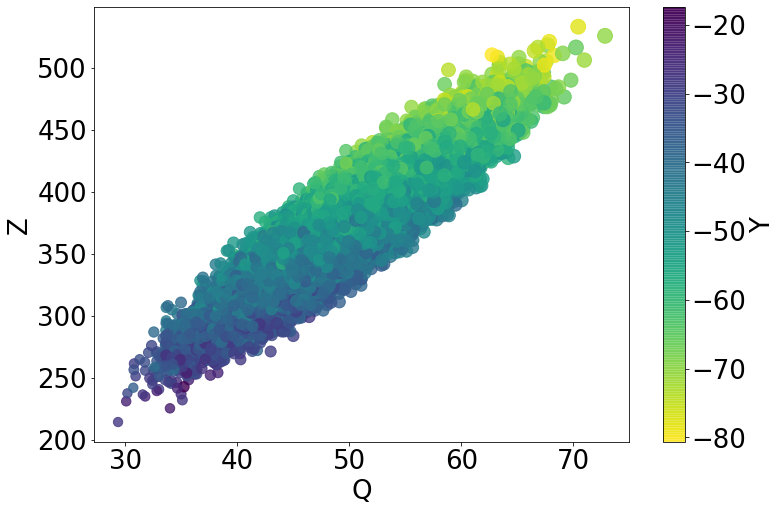

In [4]:
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 26})
fig, ax = plt.subplots(figsize = (12, 8))
df.plot.scatter(x = "Q",
                y = "Z",
                c = "Y",
                s = "X",
                cmap = "viridis_r",
                alpha = .8,
                ax = ax)

In [5]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,-0.002253,-0.003136,0.001207,0.137868
Q,-0.002253,1.000000,0.949036,-0.707630,0.914849
X,-0.003136,0.949036,1.000000,-0.671034,0.934391
Y,0.001207,-0.707630,-0.671034,1.000000,-0.846161
Z,0.137868,0.914849,0.934391,-0.846161,1.000000


In [6]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df[X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.499
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                 2.488e+04
Date:                Mon, 01 Nov 2021   Prob (F-statistic):               0.00
Time:                        21:37:32   Log-Likelihood:            -1.9942e+05
No. Observations:              100000   AIC:                         3.988e+05
Df Residuals:                   99995   BIC:                         3.989e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0062      0.004      1.670      0.0

In [7]:
residuals

,P,Q,X,Y,Z
0,-0.990613,0.260725,-0.383153,2.303401,1.823545
1,-0.010461,-2.573683,1.191685,-2.135510,0.189761
2,0.021883,-0.757764,0.117652,0.787487,1.903689
3,2.373858,-0.332379,-0.543523,0.278427,1.564743
4,1.214426,-0.286047,1.061963,-2.145432,-2.195571
...,...,...,...,...,...
99995,-0.794412,0.989010,-1.252253,1.860865,1.625967
99996,1.145274,1.864142,0.632398,1.263441,-1.577483
99997,-0.894007,1.767456,0.461235,-1.142170,-3.286967
99998,-1.889915,-0.506043,-2.067865,1.088754,5.145185


In [8]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,0.01,-0.59,0.63,0.71
Q,0.01,1.00,0.51,-0.14,-0.01
X,-0.59,0.51,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.89
Z,0.71,-0.01,0.83,-0.89,1.00


In [9]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.01,-0.59,0.63,0.71
Q,0.01,1.00,0.51,-0.14,-0.01
X,-0.59,0.51,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.89
Z,0.71,-0.01,0.83,-0.89,1.00


/Users/isaacdubovoy/opt/anaconda3/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.0.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


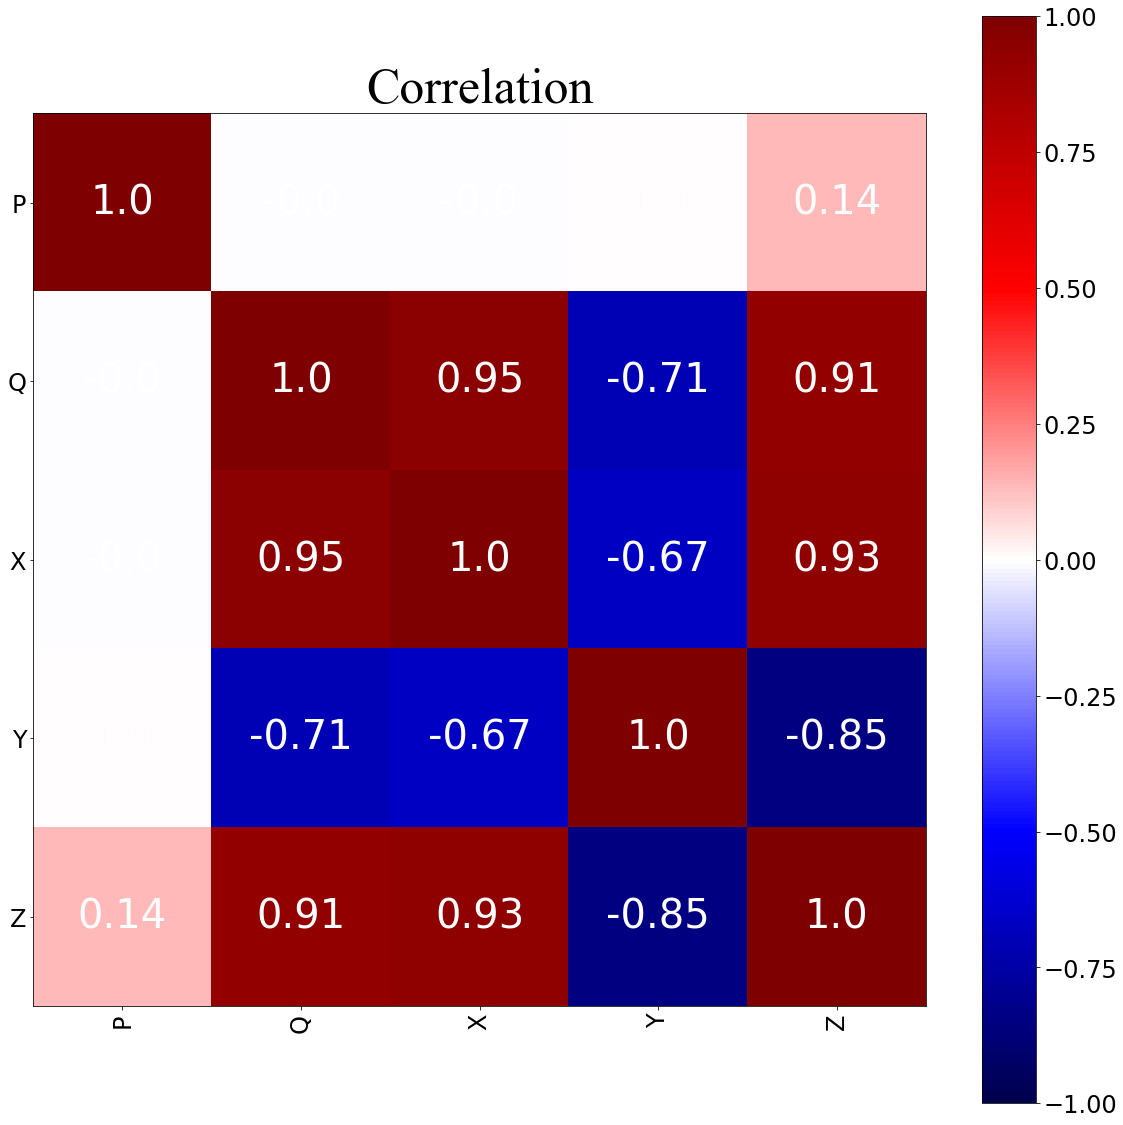

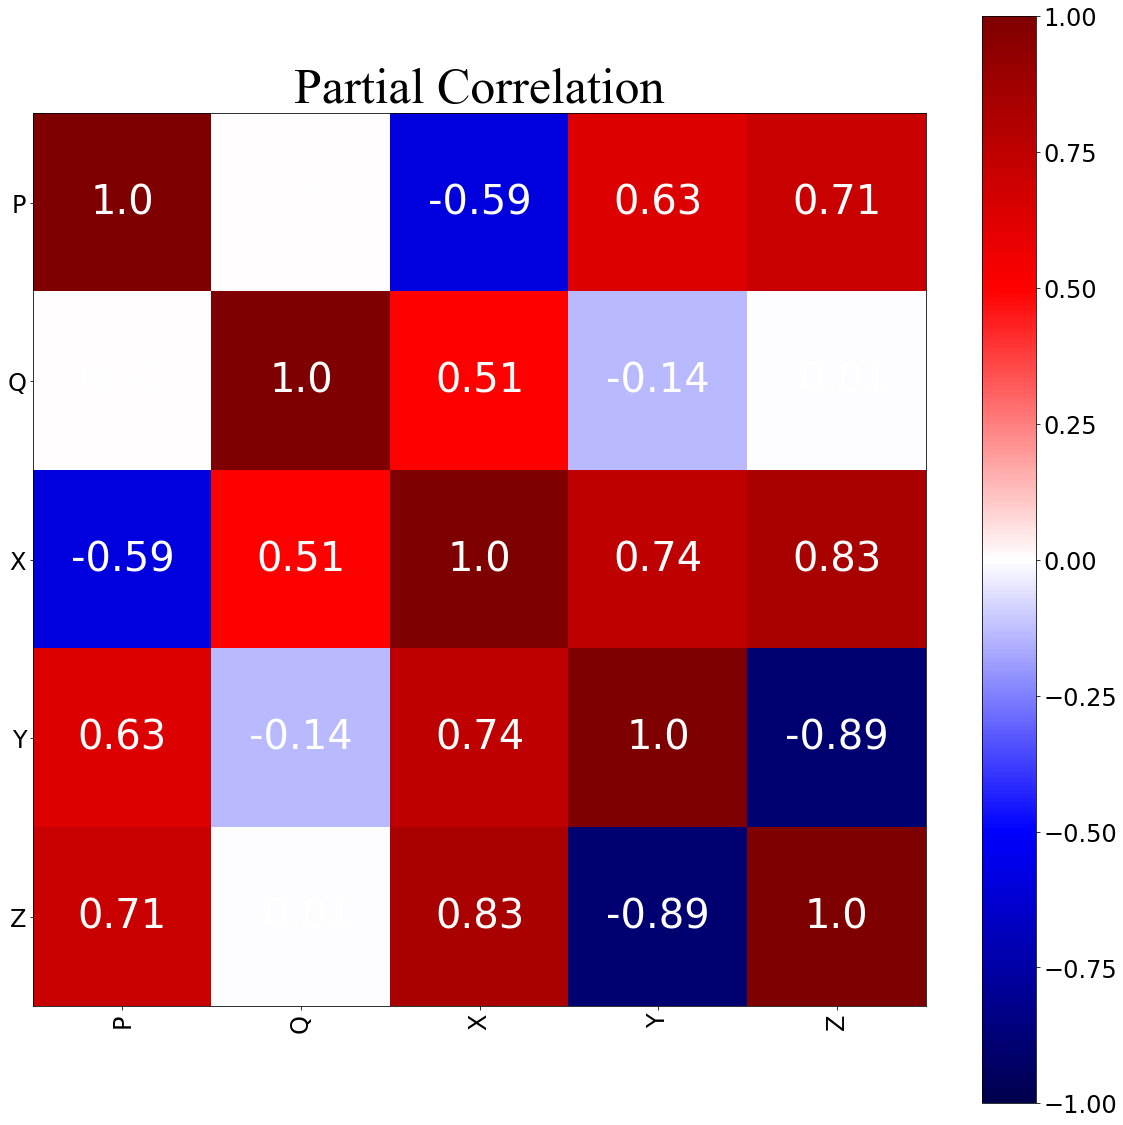

In [10]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(), save_fig = False, pp = None, title = "Correlation")
corr_matrix_heatmap(df.pcorr(), save_fig = False, pp = None, title = "Partial Correlation")

In [11]:
pcorr_pvalues = {}
for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            results = sm.OLS(Y,X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              2.790
Date:                Mon, 01 Nov 2021   Prob (F-statistic):                      0.0948
Time:                        21:37:48   Log-Likelihood:                     -1.9941e+05
No. Observations:              100000   AIC:                                  3.988e+05
Df Residuals:                   99999   BIC:                                  3.988e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
pd.DataFrame(pcorr_pvalues).round(2)

,P,Q,X,Y,Z
P,NaN,0.09,0.0,0.0,0.00
Q,0.09,NaN,0.0,0.0,0.08
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.08,0.0,0.0,NaN


# Using partial correlations to build a causal skeleton

In [13]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    remaining_vars = [y for y in df.keys() if y != x]
    for y in remaining_vars:
        undirected_graph[x].append(y)

In [14]:
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [15]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        for c_var in control_vars:
            # set c_used every time use cycle through a new control
            #  the program will then iterate through remaining controls
            #  until statistical significance is broken
            c_used = copy.copy(controls_used)
            if y in undirected_graph[x]:
                c_used.append(c_var)
                print(x,y, controls_used)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

P Z []
P Z ['Q']
P Z ['Q', 'X']
P Z ['Q']
P Z ['Q', 'Y']
P Z []
P Z ['X']
P Z ['X', 'Q']
P Z ['X']
P Z ['X', 'Y']
P Z []
P Z ['Y']
P Z ['Y', 'Q']
P Z ['Y']
P Z ['Y', 'X']
Q X []
Q X ['P']
Q X ['P', 'Y']
Q X ['P']
Q X ['P', 'Z']
Q X []
Q X ['Y']
Q X ['Y', 'P']
Q X ['Y']
Q X ['Y', 'Z']
Q X []
Q X ['Z']
Q X ['Z', 'P']
Q X ['Z']
Q X ['Z', 'Y']
Q Y []
Q Y ['P']
Q Y ['P', 'X']
Q Y ['P']
Q Y ['P', 'Z']
Q Y []
Q Y ['X']
Q Y ['X', 'P']
Q Y ['X']
Q Y ['X', 'Z']
Q Y []
Q Y ['Z']
Q Y ['Z', 'P']
Q Y ['Z']
Q Y ['Z', 'X']
Q Z []
Q Z ['P']
Q Z ['P', 'X']
X Q []
X Q ['P']
X Q ['P', 'Y']
X Q ['P']
X Q ['P', 'Z']
X Q []
X Q ['Y']
X Q ['Y', 'P']
X Q ['Y']
X Q ['Y', 'Z']
X Q []
X Q ['Z']
X Q ['Z', 'P']
X Q ['Z']
X Q ['Z', 'Y']
X Y []
X Y ['P']
X Z []
X Z ['P']
X Z ['P', 'Q']
X Z ['P']
X Z ['P', 'Y']
X Z []
X Z ['Q']
X Z ['Q', 'P']
X Z ['Q']
X Z ['Q', 'Y']
X Z []
X Z ['Y']
X Z ['Y', 'P']
X Z ['Y']
X Z ['Y', 'Q']
Y Q []
Y Q ['P']
Y Q ['P', 'X']
Y Q ['P']
Y Q ['P', 'Z']
Y Q []
Y Q ['X']
Y Q ['X', 'P']
Y Q ['X

{'P': ['Z'],
 'Q': ['X', 'Y'],
 'X': ['Q', 'Z'],
 'Y': ['Q', 'Z'],
 'Z': ['P', 'X', 'Y']}

In [16]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    print(edges)
    print(edge_labels)
    
    
    graph.add_edges_from(edges)

graph_DAG(undirected_graph, df)

[('P', 'Z'), ('Q', 'X'), ('Q', 'Y'), ('X', 'Z'), ('Y', 'Z')]
{('P', 'Z'): '0.71', ('Q', 'X'): '0.51', ('Q', 'Y'): '-0.14', ('X', 'Z'): '0.83', ('Y', 'Z'): '-0.89'}
